In [1]:
'''
Script to:
    -make 'pinched_info.dat' and 'pinched_info_key.dat' file with linear 1ms time bins
        from select snewpy models for use in snowglobes
    -copy pinched_info.dat file to snowglobes/fluxes/ directory

Aryil Bechtel 2021
'''

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u

import shutil

from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence

#import relevant snewpy model class
from snewpy.models import Zha_2021

In [2]:
#location and filename of specific model
neutrinoLabPath = "/Users/aryilbechtel/Documents/Duke_18_22/neutrino_lab/"
snewpyPath = neutrinoLabPath + "snewpy-main/"
ifile = snewpyPath + 'models/Zha_2021/s18.dat'
model = Zha_2021(ifile)

#location and filename of outfile
opath = neutrinoLabPath + "sasi/sasistudybundle/plotssnowglobes/snewpy_models/Zha_2021/pinched_info_files/s23/"
oname1 = "pinched_info_s23_1ms.dat"
oname2 = "pinched_info_key_s23_1ms.dat"
ofile1 = opath + oname1
ofile2 = opath + oname2

#location of snowglobes flux directory
snoDir = "/Applications/snowglobes/"

Flavor.NU_E
Flavor.NU_E_BAR
Flavor.NU_X
Flavor.NU_X_BAR


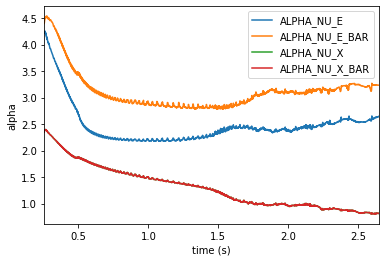

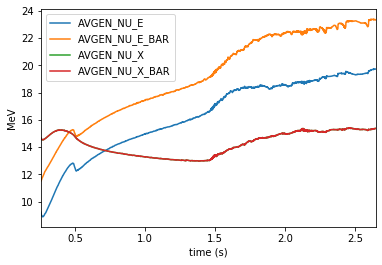

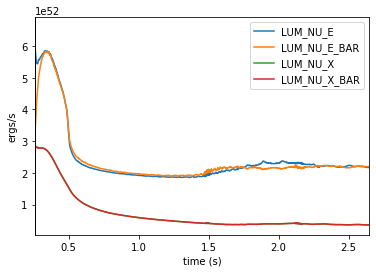

In [3]:
#create linear 1ms time bins
binsize = 0.001 #in seconds
time = np.asarray(model.time)
tStart = 0.256
tEnd = time[-1]
if time[0]<0:
    time += (-time[0])
numbins = round((tEnd - tStart)/binsize)
time_1ms = np.linspace(tStart,tEnd,numbins)

#get alpha, meanE, and luminosity params from model
numflav = 4
for flavor in Flavor:
    print(flavor)
alpha = np.zeros((numflav,time.size))
avgen = np.zeros((numflav,time.size))
lum = np.zeros((numflav,time.size))

for flavor in Flavor:
    alpha[flavor] = np.asarray(model.pinch[flavor])
    avgen[flavor] = np.asarray(model.meanE[flavor])
    lum[flavor] = np.asarray(model.luminosity[flavor])
    
#linearly interpolate to convert parameters to 1ms bins
alpha_1ms = np.zeros((numflav,time_1ms.size))
avgen_1ms = np.zeros((numflav,time_1ms.size))
lum_1ms = np.zeros((numflav,time_1ms.size))

#x-axis plot bounds
x1 = tStart#0.9
x2 = tEnd#1.21

for i in Flavor:
    alpha_1ms[i] = np.interp(time_1ms,time,alpha[i])
    avgen_1ms[i] = np.interp(time_1ms,time,avgen[i])
    lum_1ms[i] = np.interp(time_1ms,time,lum[i])
    
    plt.figure(0)
    plt.plot(time_1ms,alpha_1ms[i],label = 'ALPHA_{}'.format(i.name))
    plt.legend()
    plt.xlim([x1,x2])
    plt.xlabel("time (s)")
    plt.ylabel("alpha")
    #plt.savefig(neutrinoLabPath + "plt1",dpi = 300)
    
    plt.figure(1)
    plt.plot(time_1ms,avgen_1ms[i],label = 'AVGEN_{}'.format(i.name))
    plt.legend()
    plt.xlim([x1,x2])
    plt.xlabel("time (s)")
    plt.ylabel("MeV")
    #plt.savefig(neutrinoLabPath + "plt2",dpi = 300)
    
    plt.figure(2)
    plt.plot(time_1ms,lum_1ms[i],label = 'LUM_{}'.format(i.name))
    plt.legend()
    plt.xlim([x1,x2])
    plt.xlabel("time (s)")
    plt.ylabel("ergs/s")
    #plt.savefig(neutrinoLabPath + "plt3",dpi = 300)
    
    plt.axvline(x=0.256,color = 'black')

In [7]:
#organize params into pinched_info.dat file
#number  alpha_nu_e  alpha_nubar_e  alpha_nu_x   Eavg_nu_e   Eavg_nubar_e   Eavg_nu_x  lum_nu_e lum_nubar_e lum_nu_x
number = np.linspace(0,time_1ms.size-1,time_1ms.size)
out_array1 = np.vstack((number,\
                      alpha_1ms[Flavor(2)],alpha_1ms[Flavor(1)],alpha_1ms[Flavor(3)],\
                      avgen_1ms[Flavor(2)],avgen_1ms[Flavor(1)],avgen_1ms[Flavor(3)],\
                      lum_1ms[Flavor(2)],lum_1ms[Flavor(1)],lum_1ms[Flavor(3)]))


'''
out_array1 = np.vstack((number,\
                      alpha_1ms[Flavor(0)],alpha_1ms[Flavor(1)],alpha_1ms[Flavor(2)],\
                      avgen_1ms[Flavor(0)],avgen_1ms[Flavor(1)],avgen_1ms[Flavor(2)],\
                      lum_1ms[Flavor(0)],lum_1ms[Flavor(1)],lum_1ms[Flavor(2)]))
'''
out_array1 = np.transpose(out_array1)

#organize time info into pinched_info_key.dat file
time_1ms_dt = np.ones((1,time_1ms.size))
time_1ms_dt = time_1ms_dt*(time_1ms[1] - time_1ms[0])
out_array2 = np.vstack((number,time_1ms,time_1ms_dt))
out_array2 = np.transpose(out_array2)

#save data
np.savetxt(ofile1,out_array1,fmt='%i'+' %2.5e'*9)
np.savetxt(ofile2,out_array2,fmt='%i'+' %2.5e'*2)

In [9]:
#copy pinched_info.dat to snowglobes flux directory
shutil.copy(ofile1,snoDir + "fluxes/pinched_info.dat")

'/Applications/snowglobes/fluxes/pinched_info.dat'

Flavor.NU_X
